# #  Part 2

# 2: Classification : Convolutional Neural Networks
# 2.1: Design and Implementation Choices of your Model

# CNN network:
Firstly we have built a sequential model from the scratch as we have observed we have 5 labels of Fashion MNIST dataset and we don’t have labels for test data set, train data set is spitted in test and validation and we build simple 3 layers(just an input, one hidden layer and a output layer) rom this we have observed the data is underfitting and model fits more for validation data rather than training data. Thus, we have modified the layers by taking covn2D-conv2D-maxpool-conv2D-conv2D(which is like 7 layers one input, 5 hidden layers and 1 output layer and thus we obtained a model which fits better for training data and the parameters are also increased for the model, as the model is overfitting we have added few dropouts in between convolution nets and thus giving a stabilized accuracy and loss graphs of the model. By  doing some research from other external sources we found that Adam optimizer gives the best results for image data with learning rate of 0.001 and batch size of 128. The model we build has highest test accuracy of 93% and validation accuracy of around 91.1% for an epoch of 20.

# Resnet:
ResNet introduces the concept of skip connection due to this mitigate the problem of vanishing gradient by allowing this alternate shortcut path for gradient to flow through and They allow the model to learn an identity function which ensures that the higher layer will perform at least as good as the lower layer. The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters. The Keras ResNet got to an accuracy of 80% after training on 20 epochs with Adam optimizer and a learning rate of 0.001. The accuracy is a bit lower than our own CNN from built model. And the loss vs epochs and accuracy vs epochs graph are not that much efficient and they are more fluctuations in the graphs which is not suggestable.

# Auto Encoders:
Autoencoders are similar to dimensionality reduction techniques like Principal Component Analysis (PCA). They project the data from a higher dimension to a lower dimension using linear transformation and try to preserve the important features of the data while removing the non-essential parts. We have tried. The autoencoder is divided into two parts: there's an encoder and a decoder. From the graph we can say that the accuracy is fluctuating during 12 to 17 epochs and by comparing the other metrics such as f1 score, ROC graph from CNN, RESNET we can say that auto encoders for have poor model generalization capability and the validation and test accuracy are very less of around 50%.

# VGG-16:
VGGNet consists of 16 convolutional layers and is very appealing because of its very uniform architecture. Similar to AlexNet, only 3x3 convolutions, but lots of filters. However, VGGNet consists of 138 million parameters, which can be a bit challenging to handle. The model has more training time, vanishing gradient problem and highest test error and generalizer lesser. And the validation loss and training loss are very much less when compared with auto encoders and resnet model and considering the training and validation accuracy is too poor.

# Why CNN based approach?

By considering the below table can say that our model is much efficient and has less computation time when compared to other models and we state that our model gave best accuracy when compared with the other models we have tried so far.


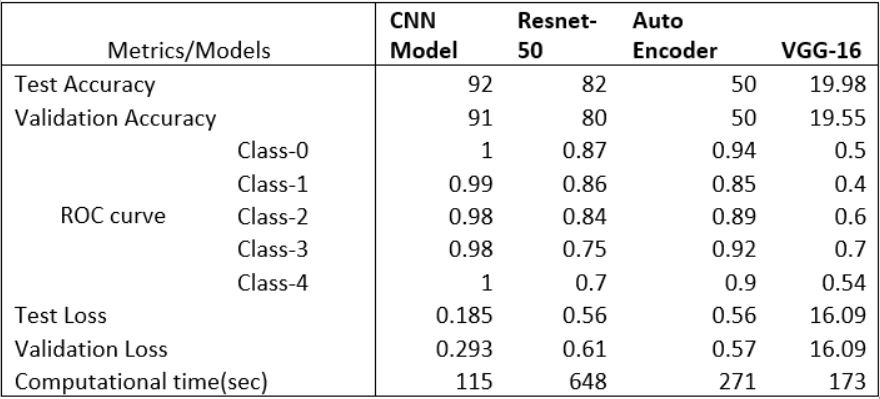

In [1]:
from IPython.display import Image
from IPython.display import display
a = Image(filename='Image4.jpg')
display(a)

# 2.2: Implementation of your Design Choices
Libraries used

• Pandas was used to handle the Data frames and to make the statistics calculations like mean, standard deviation, variance, skewness and mode.

. NumPy was used to handle arrays and to perform different calculations.

. All the convolution layers are used from Keras such as Conv2D, MaxPooling, BatchNormalization, Dropouts, Dense LAyers etc.

. Seaborn, MATLAB was used to build the subplots, plots.

. Math is for all mathematical calculations

. Timeit is used to measure execution time of small code snippets

. All the classification libraries are imported

. Modelling helpers for calculating scores and metrics of the model developed

. Pre-processing libraries are used for normalizing the data

. Compliers and data generator functions are used for constructing better model and improving the accuracy results

. All the non-linear and linear feature extraction techniques are used for feature reduction

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
#importing library functions
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)


from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,ZeroPadding2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


#Modelling data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



Using TensorFlow backend.


# About Dataset
* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label of 5 classes. Content Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

In [6]:
#Loading The Dataset
train_set = pd.read_csv('train_dataset.csv')
test_set = pd.read_csv('test_dataset.csv')
df_train = train_set.copy()
df_test = test_set.copy()

1. The Label column and Id column from the train and test data is dropped and stored in a variable such that we can use these for predicting test data labels and predict the accuracies in kaggle leaderboard.

In [7]:
#drop label and Id columns from train data
Label=df_train['Label']
df_train.drop(columns=['Label'],inplace=True)
ID=df_train['Id']
df_train.drop(columns=['Id'],inplace=True)

#drop Id for test data
Id_test=df_test['Id']
df_test.drop(columns=['Id'],inplace=True)

2. Normalization is done as below:

x = (x - min) / (max - min) ; Here min=0 and max=255****

In [8]:
#Min max normalization
df_train_std = df_train.astype("float32")/255

df_test_std= df_test.astype("float32")/255
df_test_std_kg=df_test_std

3. Spliting the training data into Train and Validation Set. Train set is used for Training the model and Validation set is used for Evaluating our Model's Performance on the Dataset. Random seed is for reproducibility

In [9]:
#splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_train_std, Label, test_size=0.1, random_state = 42)
Y_test_metrics=Y_test
X_test_metrics=X_test

4. As we have Images as 1D vector each containing 784 pixels. Before we feed the data to the CNN we must reshape the data into (28x28x1) 3D matrices because Keras wants an Extra Dimension in the end, for channels.Thus all the train, validation and test data is reshaped in to 3 channels.


In [10]:
#reshaping values
X_train = X_train.values.reshape((-1, 28, 28, 1))
X_test = X_test.values.reshape((-1, 28, 28, 1))


df_test_std = df_test_std.values.reshape((-1, 28, 28, 1))

5. A one hot encoding allows the representation of categorical data to be more expressive.Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.The Keras library offers a function called to_categorical() that you can use to one hot encode integer data. HEre we have 5 classes and for each class the vlues are encoded with 0 or 1 for example for class'0' [1,0,0,0,0] and for class'1' as [0,1,0,0,0] and so on for othr classes.

In [11]:
#one hot encoding for label data

Y_train = to_categorical(Y_train, num_classes=5)
Y_test = to_categorical(Y_test, num_classes=5)


# Building our Convolutional Neural Network

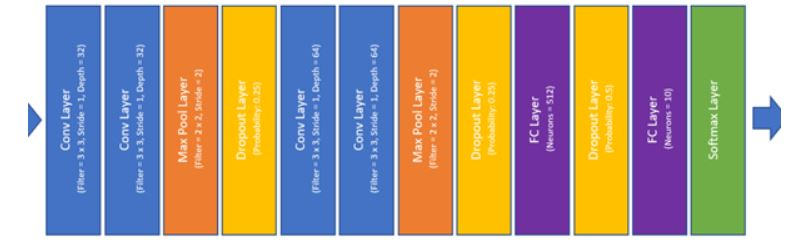

In [12]:
from IPython.display import Image
from IPython.display import display
b = Image(filename='Image5.jpg')
display(b)

The CNN architecture that we will build is as follows:

1. Firstly, we call an ‘empty’ sequential model
2. We’ll add to this empty model one layer at a time. The first layer is a conv layer with filter size 5x5, stride size 1 (in both dimensions), and depth 32. The padding is the ‘same’ and the activation is ‘relu’ (these two settings will apply to all layers in our CNN) and padding as same and we define the input shape as 28x28x1
3. we also need to specify an input size for our first layer; subsequent layers does not have this specification since they can infer the input size from the output size of the previous layer
4. The next layer is a max pooling layer with pool size 2 x 2 and stride 2 (in both dimensions). The default for a max pooling layer stride is the pool size. The purpose of the pooling layer, ultimately, is to reduce the spatial size (width and height) of the layers and it does not touch on the depth at all. This reduces the number of parameters (and thus computation) required in future layers after this pooling layer.
5. Lastly, we add a dropout layer with probability 0.25 of dropout so as to prevent overfitting.
6. And there we have it, our first four layers in code. The next four layers look really similar (except the depth of the conv layer is 64 instead of 32 and kernel size is 7x7):
7. Lastly, we have to code in our fully connected layer. However, at this point, our neurons are spatially arranged in a cube-like format rather than in just one row. To make this cube-like format of neurons into one row, we have to first flatten it. We do so by adding a Flatten layer.
8. Now, we have a dense (FC) layer of 256 neurons with relu activation.
9. We add another dropout of probability 0.25.
10. And lastly, we have a dense (FC) layer with 5 neurons and softmax activation and we see the summary of full architecture.


In [13]:

from keras.layers import ZeroPadding1D
from keras import regularizers
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D

# Building ConvNet
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',padding = 'same',use_bias=True, kernel_initializer='he_normal', input_shape=(28, 28, 1)))
                       
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',padding = 'same',kernel_initializer='he_normal',use_bias=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(7, 7), activation='relu',padding = 'same',kernel_initializer='he_normal',use_bias=True))
model.add(Conv2D(64, kernel_size=(7, 7), activation='relu',padding = 'same',kernel_initializer='he_normal',use_bias=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        100416    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        200768    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

# Compile the model
The loss function we use is called categorical cross entropy, which is applicable for a classification problem of many classes. The optimizer we use here is Adam. We haven’t gone through the intuition of Adam yet, but know that Adam is simply a type of stochastic gradient descent (with a few modifications) so that it trains better. Lastly, we want to track the accuracy of our model.

In [14]:
#compile
from keras import optimizers
#opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay= 0)
#opt = optimizers.adam(lr=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-9)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])


# Training of Model
We train our model with batch size 128 and 20 epoch
batch size: refers to the number of training examples utilized in one iteration.
epochs: indicates the number of passes through the entire training dataset the machine learning algorithm has completed

In [ ]:
#from keras.callbacks import EarlyStopping,ReduceLROnPlateau
#Callbacks=[EarlyStopping(monitor='val_accuracy',patience=3, restore_best_weights=True), 
          # ReduceLROnPlateau(patience=2)]    
import timeit
start = timeit.default_timer()

#epochs = 50
val=model.fit(X_train, Y_train, batch_size = 128, epochs = 20, 
                              validation_data = (X_test, Y_test))
stop = timeit.default_timer()
execution_time_traindata = stop - start
print('time taken to execute training data in seconds:', execution_time_traindata)
#val = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, 
                              #validation_data = (X_test, Y_test), verbose=1, 
                              #steps_per_epoch=X_train.shape[0] // batch_size)
    #print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        #j+1,epochs,max(val[j].val['accuracy']),max(val[j].val['val_accuracy']) ))                         

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 389s 7ms/step - loss: 0.7291 - accuracy: 0.6915 - val_loss: 0.4733 - val_accuracy: 0.8002
Epoch 2/20
54000/54000 [==============================] - 426s 8ms/step - loss: 0.4582 - accuracy: 0.8092 - val_loss: 0.3934 - val_accuracy: 0.8408
Epoch 3/20
18176/54000 [=========>....................] - ETA: 4:37 - loss: 0.4089 - accuracy: 0.8312

From above on traiing the model on batch_size of 128, epochs=20 we can say that our model got an accuracy of almost 90%. After 20 epochs model starts overfitting thats the reason why we have selected 20 as our best epoch. We haven't selected neither of regulaizers, batch normalization because upon using the regulaizers, batch normalization we are not getting the good accuracy and moreover loss is goes on increasing.

In [ ]:
#Run Time Performance For Test Data
start = timeit.default_timer()
Y_Data = model.predict(df_test_std)
stop = timeit.default_timer()
execution_time_testdata = stop - start
print('time taken to execute testing data in seconds:', execution_time_testdata)

In [ ]:
score = model.evaluate(X_test, Y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

# Visualization of model
After training the model, we can visualize the model training and validation loss over the number of epochs using the below code.
1. To evaluate the Underfitting or Overfitting:  Visualizing the training loss vs. validation loss or training accuracy vs. validation accuracy over a number of epochs is a good way to determine if the model has been sufficiently trained. This is important so that the model is not undertrained and not overtrained such that it starts memorizing the training data which will, in turn, reduce its ability to predict accurately.
2. To adjust the Hyperparameters: Hyperparameters such as the number of nodes per layer of the Neural Network and the number of layers in the Network can make a significant impact on the performance of the Model. Visualization of the fitness of the training and validation set data can help to optimize these values and in building a better model.

In [ ]:
# show the loss and accuracy
loss = val.history['loss']
val_loss = val.history['val_loss']
acc = val.history['accuracy']
val_acc = val.history['val_accuracy']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylim([0.1,1.0])
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylim([0.60,0.99])
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()


There are three are likely to observe in learning curves; they are:

1. Underfit: Underfitting refers to a model that cannot learn the training dataset.An underfit model can be identified from the learning curve of the training loss only.It may show a flat line or noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all.An underfit model may also be identified by a training loss that is decreasing and continues to decrease at the end of the plot.
2. Overfit: Overfitting refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.The problem with overfitting, is that the more specialized the model becomes to training data, the less well it is able to generalize to new data, resulting in an increase in generalization error. This increase in generalization error can be measured by the performance of the model on the validation dataset.A plot of learning curves shows overfitting if:The plot of training loss continues to decrease with experience.The plot of validation loss decreases to a point and begins increasing again.

3. Good Fit: A good fit is the goal of the learning algorithm and exists between an overfit and underfit model.A plot of learning curves shows a good fit if:The plot of training loss decreases to a point of stability and the plot of validation loss decreases to a point of stability and has a small gap with the training loss.

From the above graph we have obtained good fit graph where the The loss of the model will almost always be lower on the training dataset than the validation dataset. If we see the loss graph clearly we can see that there is a decrease in curve from 0.7 which is training loss and 0.45 which is a validation loss. Both the curves sync and decreases throughout the graph. Next if we see the accuracy graph clearly we can say that there is a increase in graph from 0.70 which is a training accuracy and 0.82 which is a validation accuracy. Finally both the curves sync and increases throughout the graph.

#  ROC curve for CNN model

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes=5
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
y_score = model.predict_proba(X_test)
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], y_score[:,i],pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()




From the above graph, we have plotted ROC curve for our best designed model which is CNN. We have got more than 0.96 for all 5 classes which is accurate. But, when we compared with remaining ROC curves for Resnet, VGG net, Auto encoders there is high false positive outcomes and very less true positive outcomes which is not suitable to build a model and also to predict test data. According to our analysis, this happens due to the selected architechture not suitable for data, overfitting, underfitting. The above graph is plotted for multiclass as we have 5 classes, we have individual ROC curve for all the 5 classes, the straight line represents AUC of 0.5, When there are more than two classes, it is extremely difficult, and usually impossible, to provide realistic assessments of the relative severity of the different kinds of misclassification which can arise. This is equivalent to the probability that a randomly chosen member of one class has a smaller estimated probability of belonging to the other class than has a randomly chosen member of the other class, and so is a natural measure of separability between the two estimated probability distributions thus for class_0 and class_4 has the highest AUC value (1) and for class_1, class_2 and class_3 has less AUC value when compared to otehr classes. AUC near to the 0 which means it has worst measure of separability. 

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_pred_bool)

Y_test_metrics.shape
print('Classification report of CNN model')
print(classification_report(Y_test_metrics, y_pred_bool))
print('Confusion Matrix:')
cm=metrics.confusion_matrix(Y_test_metrics, y_pred_bool)
print(cm)
plt.imshow(cm)
plt.title('Confusion Matrix of CNN model')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

For the above sequential model where different metrics such as f1 score, precision score, recall, support and Confusion matrix are evaluated.The above confusion matrix is plotted between predicted labels and True labels of train data and as we dont have labels for test data the above metrics anaylsis is  only done on train and validation datasets.

# 2.3 Kaggle Competation

In [ ]:
Y_Data = model.predict(df_test_std)
pred_digits = np.argmax(Y_Data, axis=1)
Final_res = pd.DataFrame(Id_test)
Final_res.columns = ['Id']

Final_res.insert(1,'Label',pred_digits)
Final_res.head()
Final_res.to_csv("Asg3_q2_95.95.csv",index=False)

The highest score we received on Kaggle is 90.200%. According to our analysis we can say that even there is a change in architechture, hidden layers, single parameter we experience a big change in accuracy, metrics, performance of model. All the other teams may used different architechtures, different layers, different optimizers, regulaizers, splitting of data, normalization techniques, etc. Due to that we are experiencing different performances on kaggle.

# AUTO ENCODER AND DECODER

Now we will build an autoencoder to perform dimensionality reduction on the Fashion MNIST dataset. The images are of size 28 x 28 x 1. We have converted the image matrix, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

We have used a batch size of 128 using a higher batch size of 256 or 512 is also preferable but our model well suited for bactch size of 128. It completely depends on the system you train your model.

Encoder: We took 4 Convolution blocks. We have used maxpool layer for conv2 and conv3. The first convolution block has 32 filters of size 5 x 5.The second block has 64 filters of size 5 x 5, followed by maxpooling layer. The third block of encoder will have 128 filters of size 5 x 5, followed by maxpooling layer. The fourth block of encoder will have 256 filters of size 5 x 5.

Decoder: We took 3 Convolution blocks. We have used Upsampling layer after the second and third convolution blocks. The first block has 128 filters of size 5 x 5. The second block has 64 filters of size 5 x 5 followed by another upsampling layer. The third block has 32 filters of size 5 x 5 followed by another upsampling layer. Finally, The final layer of encoder will have 1 filter of size 5 x 5 which will reconstruct back the input having a single channel.

In [ ]:

import timeit
start = timeit.default_timer()
from keras import optimizers
from keras.layers import UpSampling2D
batch_size = 128
epochs = 20
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 5



def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img) #28 x 28 x 32
    #conv1 = BatchNormalization()(conv1)
    #conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    #conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(64, (5, 5), activation='relu', padding='same')(conv1) #28 x 28 x 64
    #conv2 = BatchNormalization()(conv2)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2) #14 x 14 x 64
    
    conv2 = Conv2D(64, (5, 5), activation='relu', padding='same')(pool1)
    #conv2 = BatchNormalization()(conv2)
    conv3 = Conv2D(128, (5, 5), activation='relu', padding='same')(conv2) #14 x 14 x 128 (small and thick)
   # conv3 = BatchNormalization()(conv3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv3) #7 x 7 x 128
    
    conv3 = Conv2D(128, (5, 5), activation='relu', padding='same')(pool2)
   # conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (5, 5), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
   # conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (5, 5), activation='relu', padding='same')(conv4)
   # conv4 = BatchNormalization()(conv4)
    return conv4

conv4=encoder(input_img)
    #decoder
conv5 = Conv2D(128, (5, 5), activation='relu', padding='same')(conv4) #7 x 7 x 128
#conv5 = BatchNormalization()(conv5)
conv5 = Conv2D(128, (5, 5), activation='relu', padding='same')(conv5)
#conv5 = BatchNormalization()(conv5)
conv6 = Conv2D(64, (5, 5), activation='relu', padding='same')(conv5) #7 x 7 x 64
#conv6 = BatchNormalization()(conv6)
conv6 = Conv2D(64, (5, 5), activation='relu', padding='same')(conv6)
conv6 = BatchNormalization()(conv6)
up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
conv7 = Conv2D(32, (5, 5), activation='relu', padding='same')(up1) # 14 x 14 x 32
#conv7 = BatchNormalization()(conv7)
conv7 = Conv2D(32, (5, 5), activation='relu', padding='same')(conv7)
#conv7 = BatchNormalization()(conv7)
up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
decoded = Conv2D(1, (5, 5), activation='relu', padding='same')(up2) # 28 x 28 x 1
    
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K


autoencoder_train = Model(input_img, decoded)

opt = optimizers.adam()
autoencoder_train.compile(optimizer=opt, loss="mse", metrics=["accuracy"])

autoencoder_train.summary()

autoencoder = autoencoder_train.fit(X_train, X_train, batch_size=batch_size,epochs=epochs,verbose=1,
                                    validation_data=(X_test, X_test))
stop = timeit.default_timer()
execution_time_traindata = stop - start
print('time taken to execute training data in seconds:', execution_time_traindata)

We have trained the model on the fashion-mnist dataset for 20 epochs, Now, let's plot the loss plot and accuracy plot between training and validation data to visualize the model performance.

In [ ]:
# show the loss and accuracy
loss = autoencoder.history['loss']
val_loss = autoencoder.history['val_loss']
acc = autoencoder.history['accuracy']
val_acc = autoencoder.history['val_accuracy']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

From above graphs, we can see that the validation loss and the training loss both are in sync each other. It shows that your model is not overfitting. The validation loss is decreasing and not increasing and there is rarely any gap between training and validation loss throughout the training phase. We can say that model is not overfit and underfit. Its actually a good fit. When coming to accuracy graph between validation accuray and training accuracy, both are not sync with each other and we can say thing model is overfit and may not good for predicting test data. That is the reason why we haven't selected this architechture as our best model.

# RESNET-50

ResNet-50 is a deep residual network. The “50” refers to the number of layers it has. It’s a subclass of convolutional neural networks, with ResNet most popularly used for image classification. The main innovation of ResNet is the skip connection. As you know, without adjustments, deep networks often suffer from vanishing gradients, ie: as the model backpropagates, the gradient gets smaller and smaller. Tiny gradients can make learning intractable. This allows you to stack additional layers and build a deeper network, offsetting the vanishing gradient by allowing your network to skip through layers of it feels they are less relevant in training.

In [ ]:

#Defining constants
epochs = 20
batch_size = 128
data_augmentation = False
img_size = 28
input_size = (28, 28,1)
num_classes = 5
num_filters = 64
num_blocks = 4
num_sub_blocks = 2
use_max_pool = False


In [ ]:

from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
inputs = Input(shape=input_size)
x = Conv2D(num_filters, padding='same', 
           kernel_initializer='he_normal', 
           kernel_size=7, strides=2,
           kernel_regularizer=l2(1e-4))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

#Check by applying max pooling later (setting it false as size of image is small i.e. 28x28)
if use_max_pool:
    x = MaxPooling2D(pool_size=3,padding='same', strides=2)(x)
    num_blocks =3
#Creating Conv base stack 

# Instantiate convolutional base (stack of blocks).
for i in range(num_blocks):
    for j in range(num_sub_blocks):
        strides = 1
        is_first_layer_but_not_first_block = j == 0 and i > 0
        if is_first_layer_but_not_first_block:
            strides = 2
        #Creating residual mapping using y
        y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   strides=strides,
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(y)
        y = BatchNormalization()(y)
        if is_first_layer_but_not_first_block:
            x = Conv2D(num_filters,
                       kernel_size=1,
                       padding='same',
                       strides=2,
                       kernel_initializer='he_normal',
                       kernel_regularizer=l2(1e-4))(x)
        #Adding back residual mapping
        x = keras.layers.add([x, y])
        x = Activation('relu')(x)

    num_filters = 2 * num_filters

# Add classifier on top.
x = AveragePooling2D()(x)
y = Flatten()(x)
outputs = Dense(num_classes,
                activation='softmax',
                kernel_initializer='he_normal')(y)

# Instantiate and compile model.
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

In [ ]:
import timeit
start = timeit.default_timer()
datagen = ImageDataGenerator(rotation_range=0.15, zoom_range= 0.10,
                        width_shift_range=0.2, height_shift_range=0.2, shear_range=0.3,
                       horizontal_flip=True,vertical_flip=True)
val_resnet = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_test, Y_test), verbose=1, 
                              steps_per_epoch=X_train.shape[0] // batch_size)
stop = timeit.default_timer()
execution_time_traindata = stop - start
print('time taken to execute training data in seconds:', execution_time_traindata)

In [ ]:
# show the loss and accuracy
loss = val_resnet.history['loss']
val_loss = val_resnet.history['val_loss']
acc = val_resnet.history['accuracy']
val_acc = val_resnet.history['val_accuracy']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

From the above graph we can say that validation data is having more loss when compared with the training data and thus the fluctuating in the graph of both validation data in accuracy and loss plot says that the data is underfitted and as we are using 50 layers more training parameters are used the computational time is very larger when compared with the CNN model.

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_pred_bool)

Y_test_metrics.shape
print('Classification report of Resnet')
print(classification_report(Y_test_metrics, y_pred_bool))
print('Confusion Matrix:')
cm=metrics.confusion_matrix(Y_test_metrics, y_pred_bool)
print(cm)
plt.imshow(cm)
plt.title('Confusion Matrix of Resnet')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

For the above Resnet model where different metrics such as f1 score, precision score, recall, support and Confusion matrix are evaluated.The above confusion matrix is plotted between predicted labels and True labels of train data and as we dont have labels for test data the above metrics anaylsis is  only done on train and validation datasets.[[](http://)](http://)

# VGG-16

VGG16 is a convolutional neural network.It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another.VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters

In [ ]:
#VGG-16*************************************************************************************************
#Loading The Dataset
df_train = pd.read_csv('../input/mnistdata/Fashion_Train.csv')
df_test = pd.read_csv('../input/mnistdata/Fashion_Test.csv')

#drop label and Id columns from train data
Label=df_train['Label']
df_train.drop(columns=['Label'],inplace=True)
ID=df_train['Id']
df_train.drop(columns=['Id'],inplace=True)

#drop Id for test data
Id_test=df_test['Id']
df_test.drop(columns=['Id'],inplace=True)

df_train=np.dstack([df_train] * 3)
df_test=np.dstack([df_test]*3)
df_train.shape,df_test.shape

# Reshape images as per the tensor format required by tensorflow
df_train = df_train.reshape(-1, 28,28,3)
df_test= df_test.reshape (-1,28,28,3)
df_train.shape,df_test.shape

# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
df_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in df_train])
df_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in df_test])
#train_x = preprocess_input(x)
df_train.shape, df_test.shape

# Normalise the data and change data type
df_train = df_train / 255.
df_test = df_test / 255.
df_train = df_train.astype('float32')
df_test = df_test.astype('float32')

Y_train = to_categorical(Label, num_classes=5)

# Splitting train data as train and validation data
train_X,valid_X,train_label,valid_label = train_test_split(df_train,
                                                           Y_train,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

# Finally check the data size whether it is as per tensorflow and VGG16 requirement
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape
import timeit
start = timeit.default_timer()
# Define the parameters for instanitaing VGG16 model. 
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 128

# Preprocessing the input 
from keras.applications.vgg16 import preprocess_input
train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (df_test)

#  Create base model of VGG16
from keras.applications import VGG16;
conv_base = VGG16(weights=None,
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)
#for layer in conv_base.layers:
#    layer.trainable = False

# 6.1 Saving the features so that they can be used for future
np.savez("train_features", train_features, train_label)

np.savez("val_features", val_features, valid_label)

# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU
num_classes=5

NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 20

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model.
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label))
stop = timeit.default_timer()
execution_time_traindata = stop - start
print('time taken to execute training data in seconds:', execution_time_traindata)

In [ ]:

# plot the loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

From the above graph we can decipt that the accuracy graph of both the train and validation is not well and the train and validation data is not fitted properly to the model. Besides the training and validation loss graphs gives good results but due to overfitting the loss is very high and the computational time when compared with the CNN network is very high and thus this model is not suitable for this dataset.

# 2.4 Result Analysis

# 2.4.1 Runtime performance for training and testing.

We have tried the best classifier on training and testing data and as the feature size is 784 the runtime for training and testing data is as follows

The run time performance of CNN is: 115 seconds

The run time performance of Resnet-50 is: 648 seconds

The run time performance of Auto Encoder is: 271 seconds

The run time performance of Resnet-50 is: 173 seconds



# 2.4.2 Comparison of the different algorithms and parameters you tried.
# CNN network:
Firstly we have built a sequential model from the scratch as we have observed we have 5 labels of Fashion MNIST dataset and we don’t have labels for test data set, train data set is spitted in test and validation and we build simple 3 layers(just an input, one hidden layer and a output layer) rom this we have observed the data is underfitting and model fits more for validation data rather than training data. Thus, we have modified the layers by taking covn2D-conv2D-maxpool-conv2D-conv2D(which is like 7 layers one input, 5 hidden layers and 1 output layer and thus we obtained a model which fits better for training data and the parameters are also increased for the model, as the model is overfitting we have added few dropouts in between convolution nets and thus giving a stabilized accuracy and loss graphs of the model. By  doing some research from other external sources we found that Adam optimizer gives the best results for image data with learning rate of 0.001 and batch size of 128. The model we build has highest test accuracy of 93% and validation accuracy of around 91.1% for an epoch of 20.

# Resnet:
ResNet introduces the concept of skip connection due to this mitigate the problem of vanishing gradient by allowing this alternate shortcut path for gradient to flow through and They allow the model to learn an identity function which ensures that the higher layer will perform at least as good as the lower layer. The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters. The Keras ResNet got to an accuracy of 80% after training on 30 epochs with Adam optimizer and a learning rate of 0.001. The accuracy is a bit lower than our own built model. And the loss vs epochs and accuracy vs epochs graph are not that much efficient and they are more fluctuations in the graphs which is not suggestable.

# Auto Encoders:
Autoencoders are similar to dimensionality reduction techniques like Principal Component Analysis (PCA). They project the data from a higher dimension to a lower dimension using linear transformation and try to preserve the important features of the data while removing the non-essential parts. We have tried. The autoencoder is divided into two parts: there's an encoder and a decoder. From the graph we can say that the accuracy is fluctuating during 12 to 17 epochs and by comparing the other metrics such as f1 score, ROC graph we can say that auto encoders for have poor model generalization capability and the validation and test accuracy are very less of around 50%.

# VGG-16:
VGGNet consists of 16 convolutional layers and is very appealing because of its very uniform architecture. Similar to AlexNet, only 3x3 convolutions, but lots of filters. However, VGGNet consists of 138 million parameters, which can be a bit challenging to handle. The model has more training time, vanishing gradient problem and highest test error and generalizer lesser. And the validation loss and training loss are very much less when compared with auto encoders and resnet model and considering the training and validation accuracy is too poor.

Based on all our understanding and assumptions we can say that CNN plots are having better loss and accuracy. We can see that the validation loss and the training loss both are in sync each other. It shows that your model is not overfitting. The validation loss is decreasing and not increasing and there is rarely any gap between training and validation loss throughout the training phase. We can say that model is not overfit and underfit. Its actually a good fit. In case of validation accuracy and training accuracy also there is an sync and increases. Although there are some gaps between training and validation accuracy it predicts the test with good accuracy and performs better when compared to Resnet, VGG net, Autoencoders.

# 2.4.3 Explanation of your model (algorithms, network architechture, optimizers, regularization, design choices, numbers of parameters)

Algorithms:At first splitted the train data into train and validtion data and bu reshaping the data set into 28x28x1 since for convolution nets we should have 3 channels as for CNN networks we have encoded the output labels of train data. We have also tried different normalization menthods for train,test data and came to a conclusion that min max normalization has the best results

Network Architecture:Firstly, we call an ‘empty’ sequential model
. We’ll add to this empty model one layer at a time. The first layer is a conv layer with filter size 5x5, stride size 1 (in both dimensions), and depth 32. The padding is the ‘same’ and the activation is ‘relu’ (these two settings will apply to all layers in our CNN) and padding as same and we define the input shape as 28x28x1
. we also need to specify an input size for our first layer; subsequent layers does not have this specification since they can infer the input size from the output size of the previous layer
. The next layer is a max pooling layer with pool size 2 x 2 and stride 2 (in both dimensions). The default for a max pooling layer stride is the pool size. The purpose of the pooling layer, ultimately, is to reduce the spatial size (width and height) of the layers and it does not touch on the depth at all. This reduces the number of parameters (and thus computation) required in future layers after this pooling layer.
. Lastly, we add a dropout layer with probability 0.25 of dropout so as to prevent overfitting.
. And there we have it, our first four layers in code. The next four layers look really similar (except the depth of the conv layer is 64 instead of 32 and kernel size is 7x7):
. Lastly, we have to code in our fully connected layer. However, at this point, our neurons are spatially arranged in a cube-like format rather than in just one row. To make this cube-like format of neurons into one row, we have to first flatten it. We do so by adding a Flatten layer.
. Now, we have a dense (FC) layer of 256 neurons with relu activation.9. We add another dropout of probability 0.25.
. And lastly, we have a dense (FC) layer with 5 neurons and softmax activation and we see the summary of full architecture.

Optimizers: thus we use fashion MNIST dataset which is image classification we used different optimizers such as adam, rms, SGD, Adagrad, Adadelta and by varying different paramenters of optimizers such as learning rate, loss function and other parameters we found that ADAM optimizer has the best results with a learning rate of 0.001 and we have used loss as categotical_crossentropy because the dataset is multi-labeled and metrics to calculate is accuracy we want to plot accuracy of the model by variying different epochs.

Design Choices: We have performed on different models such as resnet-50, Vgg-16, Auto encoders etc and we came to a conclusion that the built model has the best accuracy results with less loss for the given dataset and the number of training parameters are very less and has less computation time when comapared with the other models, this network the best ROC curve for all the classes and by defining dropouts and maxpooling the dataset fits perfectly for the model without having the problem of overfitting or underfitting of data.

Parameters: We have used different parameters in design CNN network as we are building the net from the scratch we took different filters(8,16,32,64 and 128) for size of 3x3 and on increasing the higher values and the acrivation function we took relu as the best activation function for image datasets and gives the best accuracy results to the model.As the optimizers and the respective paramentes are discussed in the above paragraph the datagen function doesnt gives us best results and we used this function(which helps the input data to find different scenarios in every orientation of the image) in Resnet as the number of training paramenters are more and this function has more parameters which has to be tuned properly according to the give datasets.




# 2.4.4 You can use any plots to explain the performance of your approach. But at the very least produce two plots, one of training epoch vs. loss and one of classification accuracy vs. loss on both your training and validation set.

From the above analysis, We have plotted ROC curve for our best designed model which is CNN. We have got more than 0.96 for all 5 classes which is accurate. But, when we compared with remaining ROC curves for Resnet, VGG net, Auto encoders there is high false positive outcomes and very less true positive outcomes which is not suitable to build a model and also to predict test data. According to our analysis, this happens due to the selected architechture not suitable for data, overfitting, underfitting. We have plotted ROC for multiclass as we have 5 classes, we have individual ROC curve for all the 5 classes, the straight line represents AUC of 0.5, When there are more than two classes, it is extremely difficult, and usually impossible, to provide realistic assessments of the relative severity of the different kinds of misclassification which can arise. This is equivalent to the probability that a randomly chosen member of one class has a smaller estimated probability of belonging to the other class than has a randomly chosen member of the other class, and so is a natural measure of separability between the two estimated probability distributions thus for class_0 and class_4 has the highest AUC value (1) and for class_1, class_2 and class_3 has less AUC value when compared to otehr classes. AUC near to the 0 which means it has worst measure of separability.

Next we have plotted two plots one for training epoch  vs. loss and one for classification accuracy vs. loss for all the models we have build. But depending on the model each have there own advantages and disadvantages. For example, if we had a model with  better loss it may not perform well in accuracy and vice versa. This happens because of selected architechture is not suitable for our data. We have tried different parameters, optimizers, regulaizers, etc but the results are above. 

Based on all our understanding and assumptions we can say that CNN plots are having better loss and accuracy. We can see that the validation loss and the training loss both are in sync each other. It shows that your model is not overfitting. The validation loss is decreasing and not increasing and there is rarely any gap between training and validation loss throughout the training phase. We can say that model is not overfit and underfit. Its actually a good fit. In case of validation accuracy and training accuracy also there is an sync and increases. Although there are some gaps between training and validation accuracy it predicts the test with good accuracy and performs better when compared to Resnet, Inception, VGG net, Autoencoders. 

# 2.4.5 Evaluate your code with other metrics on the training data (by using some of it as test data) and argue for the benefit of you approach.
Different Classifier are used such as CNN, Resnet, where different metrics such as f1 score, precision score, recall, support and Confusion matrix are evaluated 
1.	F1 score:
One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall defined as:

 F1-score= 2*Precision*Recall/(Precision+Recall)

F1 score of CNN model is: 0.96

F1 score of Resnet model is:0.9086


2.	Precision:
Therefore we need to look at class specific performance metrics too. Precision is one of such metrics, which is defined as:

Precision= True_Positive/ (True_Positive+ False_Positive)

Precision score of CNN model is 0.97

Precision score of Resnet model is:0.86


3.	Recall:
Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model. More formally:

= True_Positive/ (True_Positive+ False_Negative)

Recall score of CNN model is 0.95

Recall score of Resnet model is: 0.86

By considering the above metrics for all the classifier we can depict  that CNN built model has the best accuracy and metrics values when compared with all the classifiers and Works well with even unstructured and semi structured data like text, Images  and CNN models have generalization in practice, the risk of over-fitting is less in this model and it has the property of scaling relatively well to high dimensional data.
